# Question 4

## Y.Hemanth Teja, hy1713@nyu.edu

In [1]:
import sklearn
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import r2_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import KFold

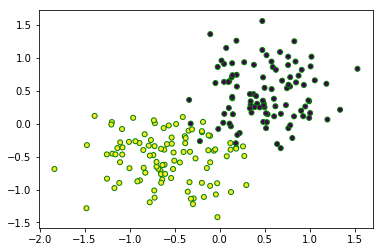

In [3]:
define_CenterPts = [[0.5,0.5], [-0.5,-0.5]]
X, y = make_blobs(n_samples = 200, centers = define_CenterPts, cluster_std = 0.4)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='g')
plt.show()

In [4]:
Zip_C_Val = list(zip(X, y))
random.shuffle(Zip_C_Val)

In [5]:
X_TrainData, Y_TrainData = zip(*Zip_C_Val)
X_TrainData = np.array(X_TrainData)
Y_TrainData = np.array(Y_TrainData)
Y_TrainData = Y_TrainData.reshape((Y_TrainData.shape[0], 1))

In [6]:
SetOfParameters = {}
Define_BatchSize = 1

In [7]:
def setInit_Params(dimension):
  w = np.zeros(shape = (dimension, 1))
  b = 0
  return w, b

In [8]:
def fn_CalCost(y, yfinal_hat):
  m = y.shape[1]
  defineCost = (-1 / m) * np.sum((y * np.log(yfinal_hat) + (1-y) * np.log(1 - yfinal_hat)))
  return defineCost

In [9]:
def fn_GD_optimization(w, b, X, y,  num_IterEpochs, LearningRateAlpha):
  SetofCosts = []
  for i in range(num_IterEpochs):
    dw, db, defineCost = fn_ComputePropogation(w, b, X, y)
    w = w - LearningRateAlpha/(i+1) * dw
    b = b - LearningRateAlpha/(i+1) * db
    SetofCosts.append(defineCost)
    if i%2 == 0:
     print("The Cost incurred after the iteration{} is {}".format(i, defineCost))
  
  return w, b, SetofCosts

In [10]:
def Fn_SigmoidCalc(x):
  return 1 / (1 + np.exp(-x))

In [11]:
def fn_ComputePropogation(w, b, X, y):
  m = X.shape[1]
  z = Fn_SigmoidCalc(np.dot(w.T, X) + b) 
  defineCost = fn_CalCost(y, z)
  dw = (1 / m) * np.dot(X, (z - y).T)
  db = (1 / m) * np.sum(z - y)
  defineCost = np.squeeze(defineCost)
  return  dw, db, defineCost

In [12]:
def fn_SGD_optimization(w, b, X, y,  num_IterEpochs, LearningRateAlpha, bs = Define_BatchSize):
  SetofCosts = []
  for i in range(num_IterEpochs):
    init_Cost = 0
    for j in range(0, X.shape[1], bs):
      X_minVal, Y_minVal = X[:, j : j + bs], y[:, j : j + bs]
      dw, db, defineCost = fn_ComputePropogation(w, b, X_minVal, Y_minVal)
      w = w - LearningRateAlpha/(i+1) * dw
      b = b - LearningRateAlpha/(i+1) * db
      init_Cost += defineCost
    SetofCosts.append(init_Cost/bs)
    if i%2 == 0:
      print("The Cost incurred after the iteration {} is {}".format(i, init_Cost/X_minVal.shape[1]))
    
  return w, b, SetofCosts

In [13]:
def model(X_TrainData, Y_TrainData, num_IterEpochs = 200, LearningRateAlpha = 0.5, sgd_flag = False):
  w, b = setInit_Params(X_TrainData.shape[0])
  if not sgd_flag:
    w, b, SetofCosts = fn_GD_optimization(w, b, X_TrainData, Y_TrainData, num_IterEpochs, LearningRateAlpha)
  else:
    w, b, SetofCosts = fn_SGD_optimization(w, b, X_TrainData, Y_TrainData, num_IterEpochs, LearningRateAlpha)
  return w, b, SetofCosts

In [14]:
for i in range(len(Y_TrainData)):
  if Y_TrainData[i] == -1:
    Y_TrainData[i] = 0
w, b, SetofCosts = model(X_TrainData.T, Y_TrainData.T, num_IterEpochs = 1200)
SetOfParameters['w'] = w
SetOfParameters['b'] = b


The Cost incurred after the iteration0 is 0.6931471805599452
The Cost incurred after the iteration2 is 0.6030881662201469
The Cost incurred after the iteration4 is 0.5746315793741378
The Cost incurred after the iteration6 is 0.5581893803845489
The Cost incurred after the iteration8 is 0.5468104290939141
The Cost incurred after the iteration10 is 0.5381929403088622
The Cost incurred after the iteration12 is 0.5313016206668025
The Cost incurred after the iteration14 is 0.5255855972622123
The Cost incurred after the iteration16 is 0.5207183131945924
The Cost incurred after the iteration18 is 0.5164909392620075
The Cost incurred after the iteration20 is 0.5127621944513165
The Cost incurred after the iteration22 is 0.5094322400714988
The Cost incurred after the iteration24 is 0.5064280287633913
The Cost incurred after the iteration26 is 0.5036945767902311
The Cost incurred after the iteration28 is 0.501189507839023
The Cost incurred after the iteration30 is 0.4988795032173482
The Cost incur

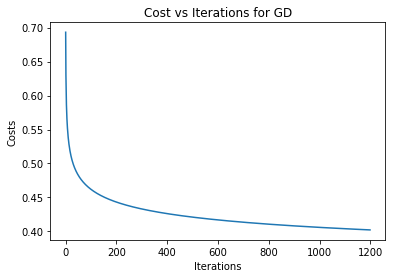

In [15]:
plt.title('Cost vs Iterations for GD')
plt.ylabel('Costs') 
plt.xlabel('Iterations')
plt.plot(SetofCosts)

In [16]:
w, b, SetofCosts = model(X_TrainData.T, Y_TrainData.T, sgd_flag = True, num_IterEpochs = 500)
SetOfParameters['SGD_w'] = w
SetOfParameters['SGD_b'] = b

The Cost incurred after the iteration 0 is 35.26524147222995
The Cost incurred after the iteration 2 is 18.385402854392837
The Cost incurred after the iteration 4 is 17.163732975139666
The Cost incurred after the iteration 6 is 16.60539987898177
The Cost incurred after the iteration 8 is 16.268369962948793
The Cost incurred after the iteration 10 is 16.036239513757668
The Cost incurred after the iteration 12 is 15.86343371675058
The Cost incurred after the iteration 14 is 15.72801902182455
The Cost incurred after the iteration 16 is 15.617974130073504
The Cost incurred after the iteration 18 is 15.526088525329413
The Cost incurred after the iteration 20 is 15.44773987847008
The Cost incurred after the iteration 22 is 15.379809530504694
The Cost incurred after the iteration 24 is 15.320106157265135
The Cost incurred after the iteration 26 is 15.267038327109267
The Cost incurred after the iteration 28 is 15.219418172913818
The Cost incurred after the iteration 30 is 15.176338335573517
Th

The Cost incurred after the iteration 258 is 14.24802196046837
The Cost incurred after the iteration 260 is 14.245684796788652
The Cost incurred after the iteration 262 is 14.243370397398094
The Cost incurred after the iteration 264 is 14.241078363559287
The Cost incurred after the iteration 266 is 14.238808306538772
The Cost incurred after the iteration 268 is 14.236559847281725
The Cost incurred after the iteration 270 is 14.234332616099818
The Cost incurred after the iteration 272 is 14.232126252371081
The Cost incurred after the iteration 274 is 14.229940404251966
The Cost incurred after the iteration 276 is 14.22777472840016
The Cost incurred after the iteration 278 is 14.225628889708418
The Cost incurred after the iteration 280 is 14.223502561048532
The Cost incurred after the iteration 282 is 14.221395423024989
The Cost incurred after the iteration 284 is 14.219307163737945
The Cost incurred after the iteration 286 is 14.217237478555196
The Cost incurred after the iteration 288 

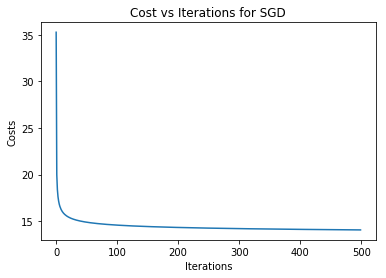

In [17]:
plt.title('Cost vs Iterations for SGD')
plt.ylabel('Costs') 
plt.xlabel('Iterations') 
plt.plot(SetofCosts)

In [18]:
def pred_values(w, X, b):
    Prob_PredictionVal = Fn_SigmoidCalc(np.dot(w.T, X) + b) 
    PredictionVal = np.where(Prob_PredictionVal >= .5, 1, 0) 
    return np.squeeze(PredictionVal) 

In [19]:
def calculateAccuracy(yfinal_hat, y):
  correctSamples = np.sum(yfinal_hat == y)
  accuracy = np.mean(yfinal_hat == y)
  return accuracy, correctSamples

In [20]:
def FnToPredict(X, w, b):
  z = (Fn_SigmoidCalc(np.dot(w.T, X_TrainData.T) + b)).T
  yfinal_hat = np.where(z > 0.5, 1, 0)
  return yfinal_hat

In [21]:
def plot(X, y, w, b, SetTitle):
  w = w.T
  y = np.squeeze(y)
  x_0 = X[np.where(y == 0.0)]
  x_1 = X[np.where(y == 1.0)]
  plt.scatter([x_0[:, 0]], [x_0[:, 1]], c='b') 
  plt.scatter([x_1[:, 0]], [x_1[:, 1]], c='r') 
  x1 = np.arange(-1, 1, 0.2) 
  x2 = -(b + w[0,0]*x1)/w[0,1] 
  plt.plot(x1, x2, c='k', label='The Decision Boundary') 
  plt.title(SetTitle)
  plt.xlabel('Val of x1') 
  plt.ylabel('Val of x2') 
  plt.legend() 
  plt.show() 

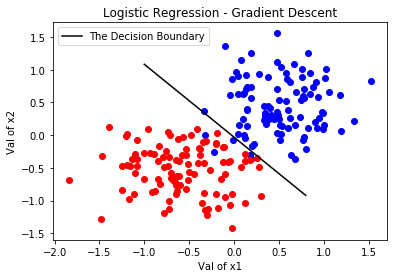

In [22]:
plot(X_TrainData, Y_TrainData, SetOfParameters['w'], SetOfParameters['b'], 'Logistic Regression - Gradient Descent')

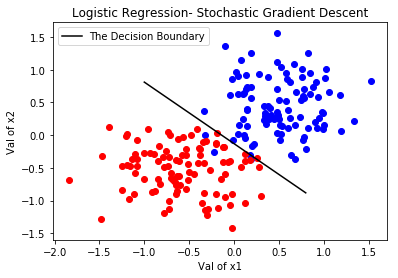

In [23]:
plot(X_TrainData, Y_TrainData, SetOfParameters['SGD_w'], SetOfParameters['SGD_b'], 'Logistic Regression- Stochastic Gradient Descent')

In [24]:
print(SetOfParameters)
yfinal_hat = FnToPredict(X_TrainData, SetOfParameters['w'], SetOfParameters['b'])
Final_Accuracy, Val_CorrectedForClassified = calculateAccuracy(yfinal_hat, Y_TrainData)
print('GD : Calculated Accuracy = {}, Labels classified correctly are = {}'.format(Final_Accuracy, Val_CorrectedForClassified))

{'w': array([[-0.77778978],
       [-0.6985916 ]]), 'b': -0.021326508796935154, 'SGD_w': array([[-6.21320567],
       [-6.605452  ]]), 'SGD_b': -0.8594973593657562}
GD : Calculated Accuracy = 0.975, Labels classified correctly are = 195


In [25]:
yfinal_hat = FnToPredict(X_TrainData, SetOfParameters['SGD_w'], SetOfParameters['SGD_b'])
Final_Accuracy, Val_CorrectedForClassified = calculateAccuracy(yfinal_hat, Y_TrainData)
print('SGD :Calculated Accuracy = {}, Labels classified correctly are = {}'.format(Final_Accuracy, Val_CorrectedForClassified))

SGD :Calculated Accuracy = 0.98, Labels classified correctly are = 196
